Accuracy: 0.5
Precision: 0.25
Recall: 0.5
F1: 0.3333333333333333


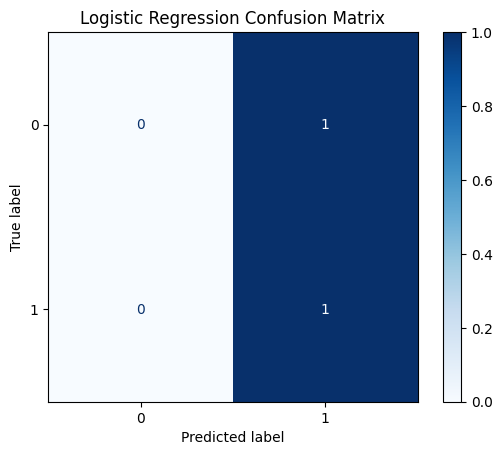

Predictions on new text: ['positive' 'positive']


In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data.tsv', sep='\t')
X = data['text']
y = data['tag']

# Convert text to features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Split for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1:", f1_score(y_test, y_pred, average='weighted'))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Predict on new data
new_text = ['This is a test sentence', 'Another test sentence']
new_X = vectorizer.transform(new_text)
new_y = clf.predict(new_X)
print("Predictions on new text:", new_y)
